In [1]:
import xarray as xr

In [ ]:
gridmet_URL = [
    "http://thredds.northwestknowledge.net:8080/thredds/dodsC/agg_met_tmmx_1979_CurrentYear_CONUS.nc#fillmismatch",
    "http://thredds.northwestknowledge.net:8080/thredds/dodsC/agg_met_tmmn_1979_CurrentYear_CONUS.nc#fillmismatch",
]
data = xr.open_mfdataset(gridmet_URL)

In [7]:
print(data)

<xarray.Dataset> Size: 220GB
Dimensions:                    (lat: 585, crs: 1, lon: 1386, day: 16943)
Coordinates:
  * lat                        (lat) float64 5kB 49.4 49.36 ... 25.11 25.07
  * crs                        (crs) float32 4B 3.0
  * lon                        (lon) float64 11kB -124.8 -124.7 ... -67.1 -67.06
  * day                        (day) datetime64[ns] 136kB 1979-01-01 ... 2025...
Data variables:
    daily_maximum_temperature  (day, lat, lon) float64 110GB dask.array<chunksize=(16943, 585, 1386), meta=np.ndarray>
    daily_minimum_temperature  (day, lat, lon) float64 110GB dask.array<chunksize=(16943, 585, 1386), meta=np.ndarray>
Attributes: (12/19)
    geospatial_bounds_crs:      EPSG:4326
    Conventions:                CF-1.0
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.40000000000000
    geospatial_lon_min:         -124.7666666333333
    ...

In [22]:
data.coords

Coordinates:
  * lat      (lat) float64 5kB 49.4 49.36 49.32 49.28 ... 25.15 25.11 25.07
  * crs      (crs) float32 4B 3.0
  * lon      (lon) float64 11kB -124.8 -124.7 -124.7 ... -67.14 -67.1 -67.06
  * day      (day) datetime64[ns] 136kB 1979-01-01 1979-01-02 ... 2025-05-21

In [25]:
subset = data.sel(
    day=slice("2000-01-01", "2023-12-31"),
    lat=slice(34.1, 33.0),
    lon=slice(
        -111.1, -110.0
    ),  # Must ensure the slice direction matches coordinate order
)

In [ ]:
foo = subset.values

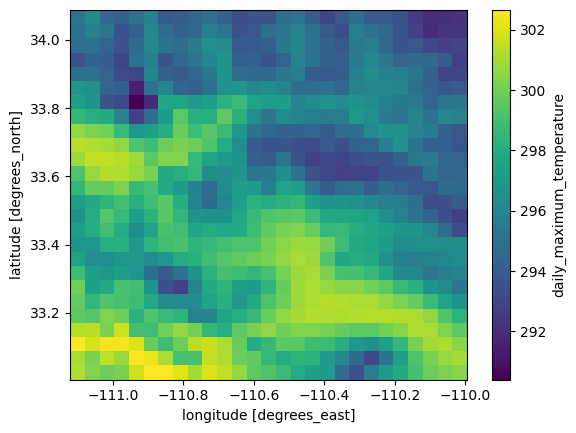

In [26]:
subset["daily_maximum_temperature"].mean(dim="day").plot()